In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [ ]:
df1 = pd.read_csv("/content/bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape


(13320, 9)

In [ ]:
df1.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [ ]:
# noisy data
df2 = df1.drop(['area_type','society','availability','balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df3=df2.dropna()
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df3['Bedroom']=df3['size'].apply(lambda x : int(x.split(' ')[0]))
df3.head()

<ipython-input-9-519af31d23b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Bedroom']=df3['size'].apply(lambda x : int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True
df3[df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,Bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return(float(tokens[0]) + float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
convert_sqft_to_num('2166')

2166.0

In [ ]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()


,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df4.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
Bedroom,4


In [ ]:
df4.head()

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
len(df5.location.unique())

1304

In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [ ]:
len(location_stats[location_stats<=10])

1052

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Basapura,10
1st Block Koramangala,10
Gunjur Palya,10
Kalkere,10
Sector 1 HSR Layout,10
...,...
1 Giri Nagar,1
"Kanakapura Road,",1
Kanakapura main Road,1


In [ ]:
# apply(lambda x: x.strip()) → Removes any leading or trailing spaces in the 'location' column.
# Ensures consistency in location names (e.g., " New York" becomes "New York")
#df5.groupby('location') → Groups the DataFrame by the 'location' column.
#['location'].agg('count') → Counts how many times each location appears

df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [ ]:
df5.head()

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df5[df5.total_sqft/df5.Bedroom<300].head()

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
df5.shape

(13246, 7)

In [ ]:
#df5.total_sqft / df5.Bedroom < 300 →
#Creates a condition to check if square feet per bedroom is less than 300.

#~(...) (Tilde ~) →
#Negates the condition, meaning it keeps only rows where sqft/bedroom is 300 or more.

#df5[...] →
#Selects and stores the filtered DataFrame in df6.

#df6.shape →
#Returns the number of rows and columns in df6.

df6 = df5[~(df5.total_sqft/df5.Bedroom < 300)]
df6.shape

(12502, 7)

In [ ]:
df6.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [ ]:
#Create an empty DataFrame (df_out) → This will store the cleaned data.

#Group by 'location' →
    #The function processes each location separately.
    #This ensures we remove outliers relative to each location, not the entire dataset.

#Calculate mean and standard deviation of price_per_sqft for each location.

#Filter data using standard deviation:
    #Keeps only values within one standard deviation of the mean.
    #Removes extreme outliers (both low and high[range ekt wada godak wadi values]).

#Concatenate the filtered data into df_out.

#Return the cleaned DataFrame (df_out).

def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

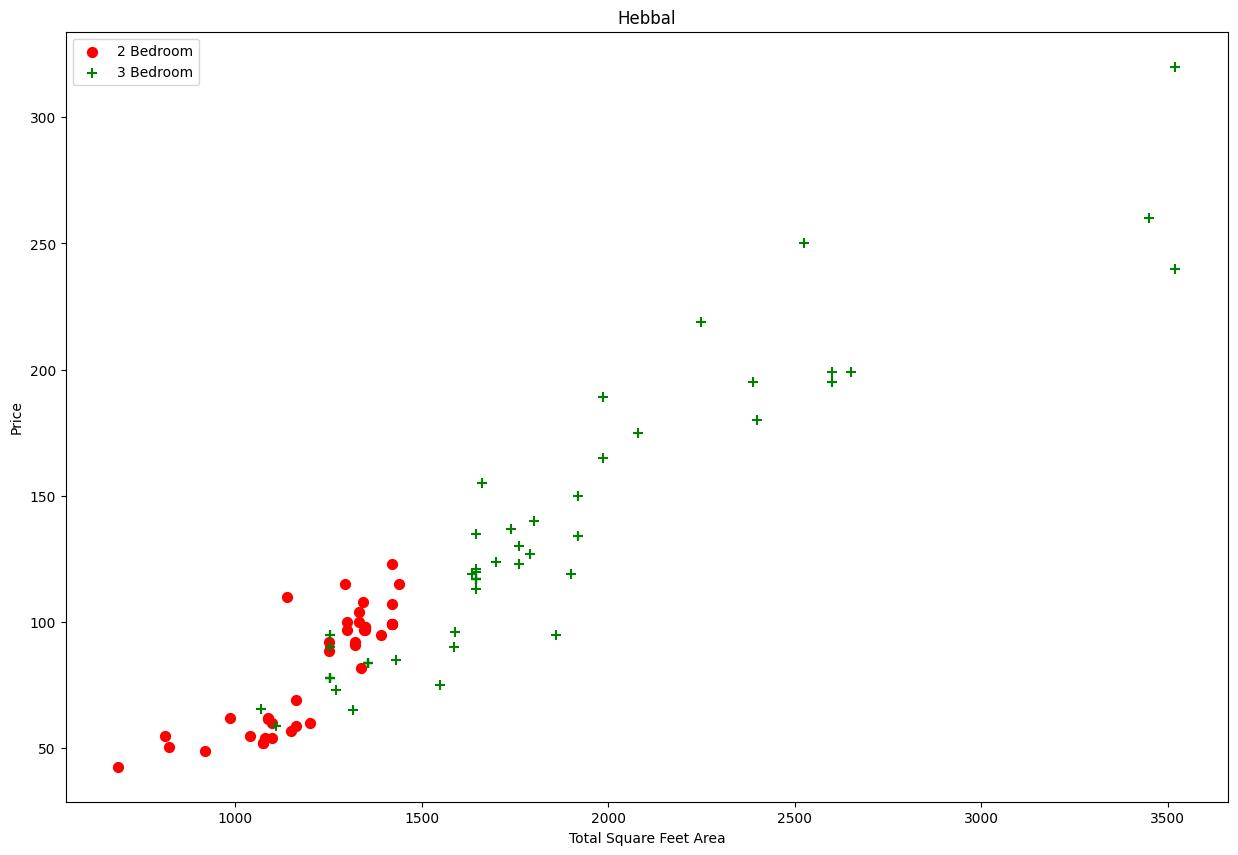

In [ ]:
### **Simple Explanation of the Code**

#This function **plots a scatter chart** to compare the price of **2-bedroom and 3-bedroom houses** in a given location.



### **Step-by-Step Breakdown:**
#1. **Filter the data based on location and number of bedrooms**
  # - `Bedroom2`: Selects houses with **2 bedrooms** in the given `location`.
   #- `Bedroom3`: Selects houses with **3 bedrooms** in the given `location`.

#2. **Set figure size**
  # - `matplotlib.rcParams['figure.figsize'] = (15, 10)`:
   #  - Makes the graph bigger (**15 inches wide and 10 inches tall**).

#3. **Plot the scatter points**
  # - `plt.scatter(Bedroom2.total_sqft, Bedroom2.price, color='red', label='2 Bedroom', s=50)`:
  #  - **Red dots** represent **2-bedroom houses**.
  # - `total_sqft` (size of house) on **X-axis**.
  #   - `price` on **Y-axis**.
  # - `plt.scatter(Bedroom3.total_sqft, Bedroom3.price, marker='+', color='green', label='3 Bedroom', s=50)`:
  #   - **Green plus signs** represent **3-bedroom houses**.

 # 4. **Label the axes and add a title**
   #  - `plt.xlabel("Total Square Feet Area")`: Labels X-axis.
   # - `plt.ylabel("Price")`: Labels Y-axis.
   # - `plt.title(location)`: Title of the chart (shows location name).

 # 5. **Add a legend**
    # - `plt.legend()`: Displays labels for **2-bedroom (red)** and **3-bedroom (green)** houses.

#6. **Calling the function**
  # - `plot_scatter_chart(df7, "Hebbal")`:
   #  - Plots data for **Hebbal** using the dataset `df7`.



### **What the Chart Shows:**
#- **Red dots** = 2-bedroom houses.
#- **Green plus signs** = 3-bedroom houses.
#- Helps compare **price vs. house size** for different bedroom types.


def plot_scatter_chart(df,location):
  Bedroom2 = df[(df.location == location) & (df.Bedroom == 2)]
  Bedroom3 = df[(df.location == location) & (df.Bedroom == 3)]
  matplotlib.rcParams['figure.figsize'] = (15, 10)
  plt.scatter(Bedroom2.total_sqft,Bedroom2.price,color='red',label='2 Bedroom',s=50)
  plt.scatter(Bedroom3.total_sqft,Bedroom3.price,marker='+',color='green',label='3 Bedroom',s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df7,"Hebbal")
plt.show()

In [ ]:
def remove_Bedrooms_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    Bedroom_stats = {}
    for Bedroom, Bedroom_df in location_df.groupby('Bedroom'):
      Bedroom_stats[Bedroom] = {
          'mean':np.mean(Bedroom_df.price_per_sqft),
          'std':np.std(Bedroom_df.price_per_sqft),
          'count': Bedroom_df.shape[0]
      }
    for Bedroom, Bedroom_df in location_df.groupby('Bedroom'):
      stats = Bedroom_stats.get(Bedroom-1)
      if stats and stats['count'] > 5:
        exclude_indices = np.append(exclude_indices,Bedroom_df[Bedroom_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis = 'index')

df8 = remove_Bedrooms_outliers(df7)
df8.shape

(7329, 7)

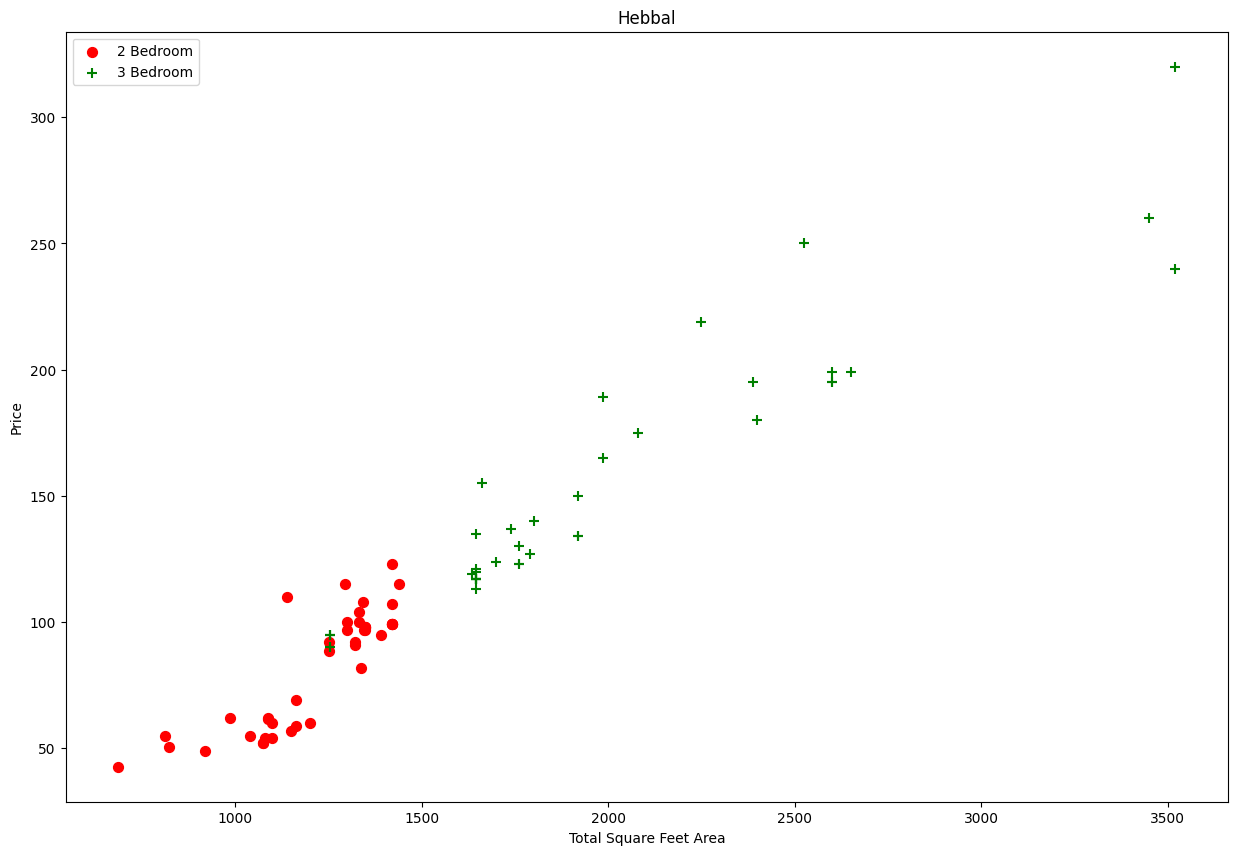

In [ ]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

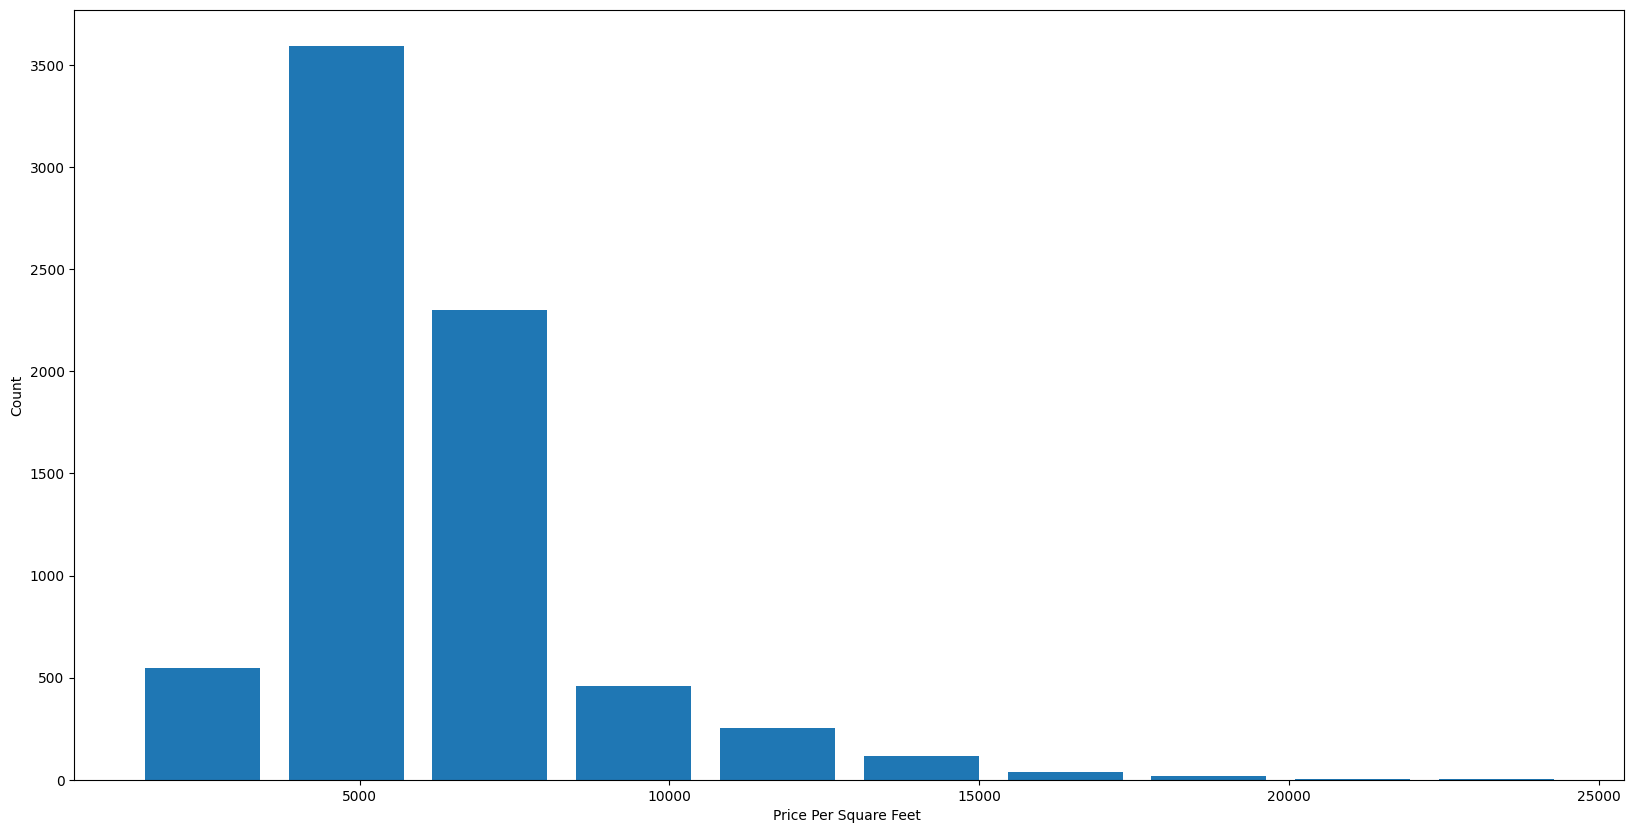

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet ')
plt.ylabel("Count")

In [44]:
!rm -rf NestWorth
